Simple 2D (x, time) example where we use the day of the year as an additional dimension to simulate detrending.

In [1]:
using divand
using PyPlot

INFO: Precompiling module PyPlot.


# Create data

In [22]:
dateinit = Dates.Date(2001,1,1);
dateend = Dates.Date(2015, 1, 1);
ndaysinit = Dates.date2epochdays(dateinit);
ndaysend = Dates.date2epochdays(dateend);

735964

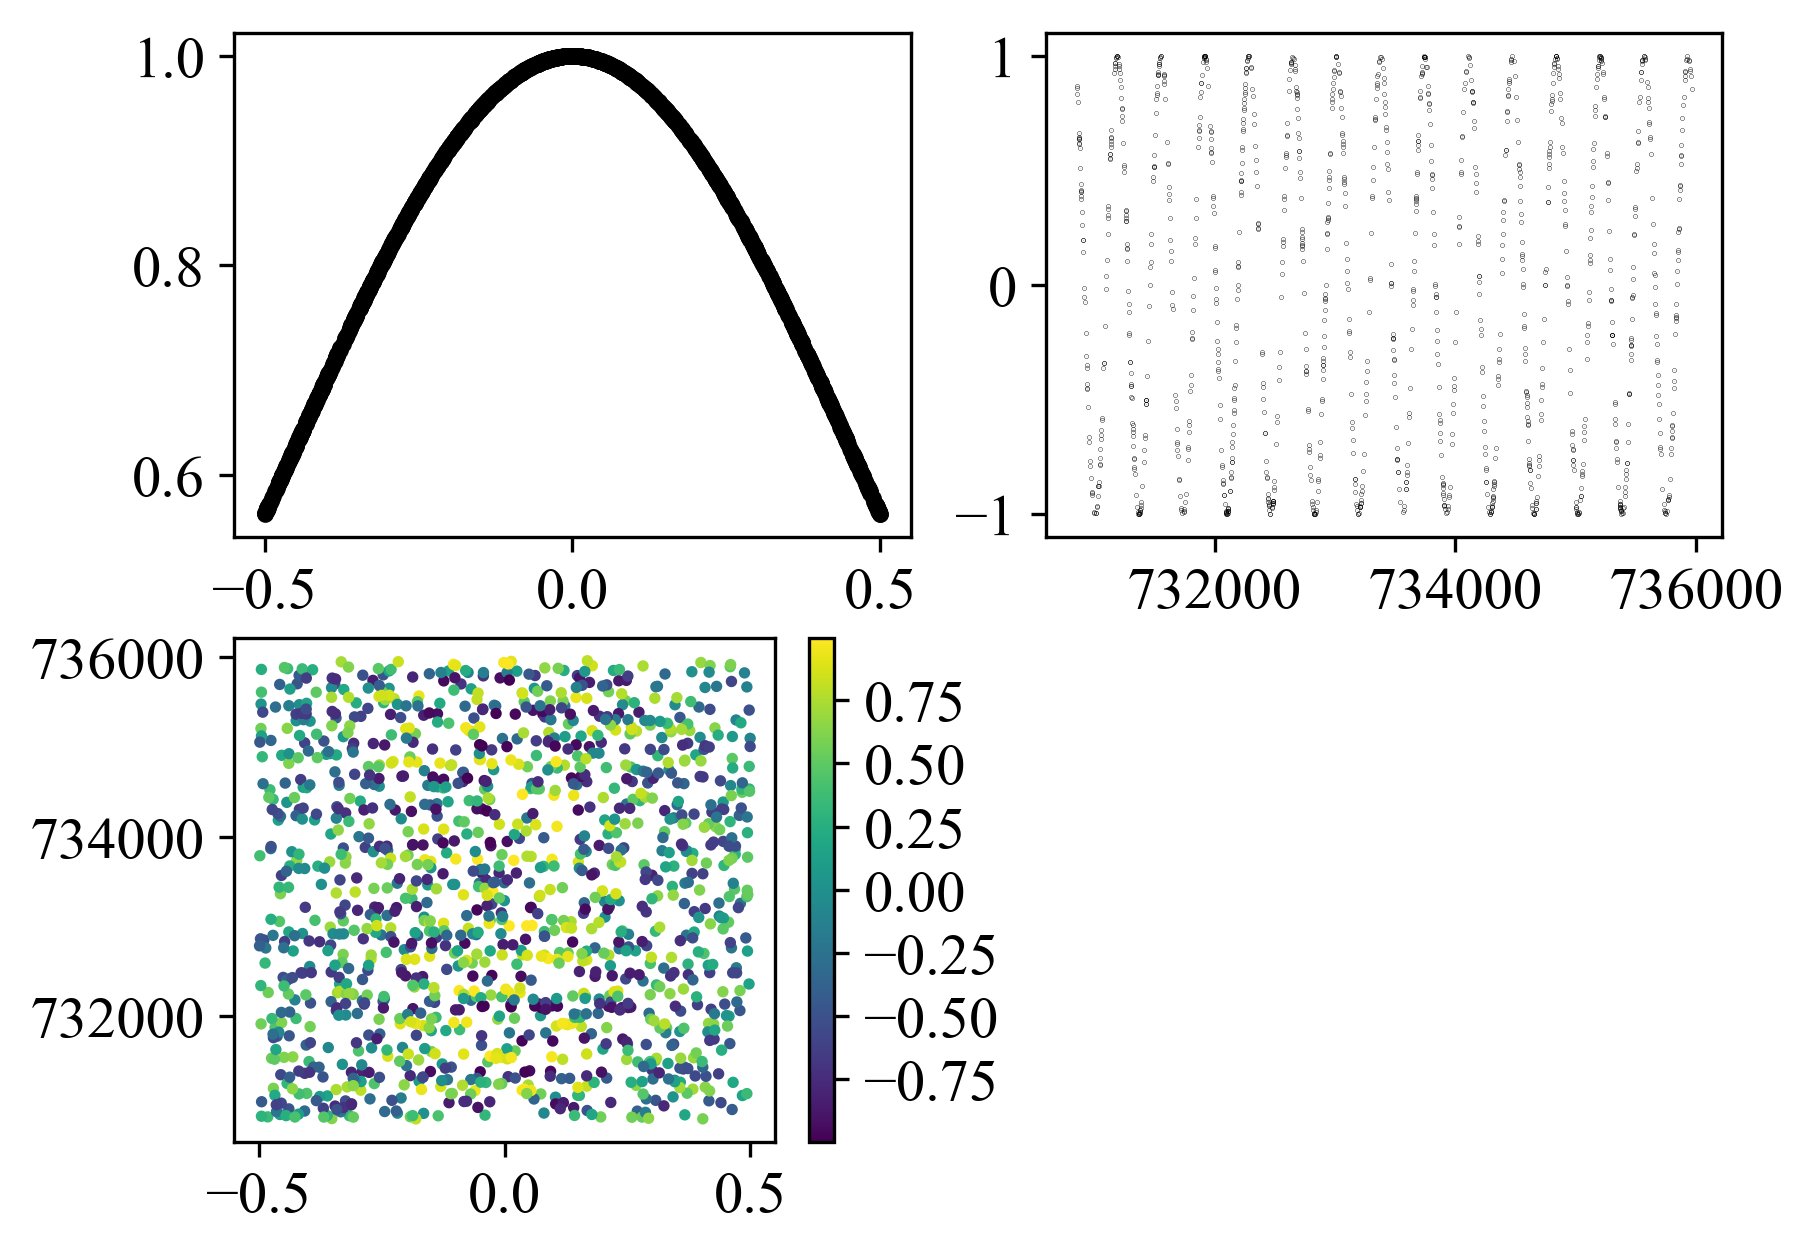

In [50]:
# observations
const Npoints = 1330;
x = -.5 + rand(Npoints);
t = ndaysinit + rand(Npoints) * (ndaysend - ndaysinit);
fx = exp10.(-x.*x);
ft = sin.(2 * pi * t/365);
figure();
subplot(221)
plot(x, fx, "k.");
subplot(222)
plot(t, ft, "k.", markersize=.2);
fxt = fx .* ft;
subplot(223)
scat = scatter(x, t, s=3, c=fxt);
colorbar(scat);

In [72]:
mean(fxt)

0.0010322417341516812

## Final grid

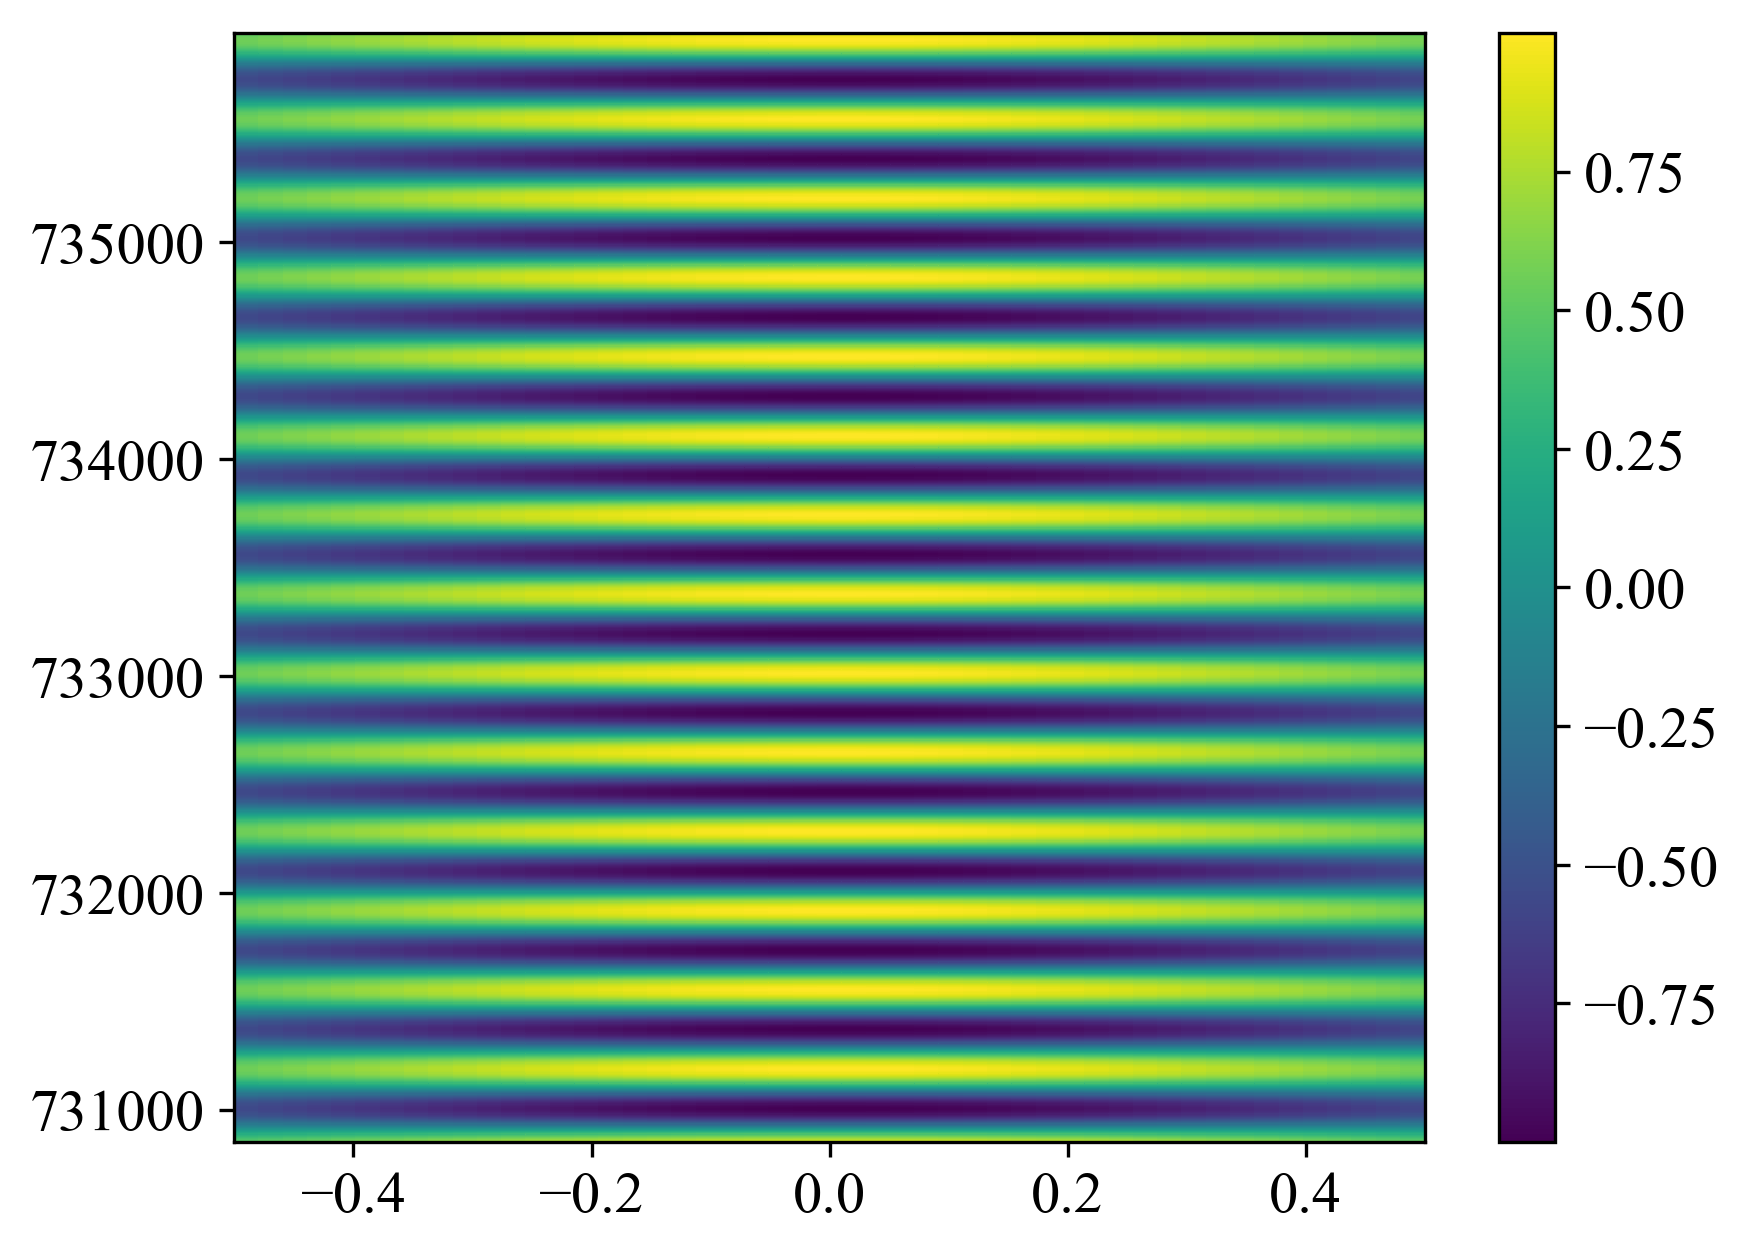

In [57]:
const Nx = 50;t
const Nt = 1000;
xi, ti = ndgrid(linspace(-0.5, 0.5, Nx), linspace(ndaysinit, ndaysend, Nt));

# reference field
fref = exp10.(-xi.*xi) .* sin.(2 * pi * ti/365);
figure;
pcm = pcolormesh(xi, ti, fref);
colorbar(pcm);

In [73]:
mask = trues(xi);
px = ones(xi) / (xi[2,1]-xi[1,1]);
pt = ones(xi) / (ti[1,2]-ti[1,1]);

# correlation length
const lenx = 0.1;
const lent = 10;
# obs. error variance normalized by the background error variance
const epsilon2 = 1.;

# Perform analysis
Loop over a some parameter values and perform the analysis

In [ ]:
function compute_anom(field, fieldref)
    anomfield = field - fieldref;
    fielcorr = cor(vec(field), vec(fieldref))
    fieldrms = 
end

In [82]:
const lenxvalues = (0.1, 0.2, 0.5, 1., 3., 10.)
const lentvalues = (0.5, 1, 10, 20, 50.)
for vx in lenxvalues;
    for vt in lentvalues
        @time fi,s = divandrun(mask,(px,pt),(xi, ti),(x, t), fxt, (lenx, lent), epsilon2);
    end
end;

0.1
0.2
0.5
1.0
3.0
10.0


In [74]:
# fi is the interpolated field
@time fi,s = divandrun(mask,(px,pt),(xi, ti),(x, t), fxt, (lenx, lent), epsilon2);

  1.027430 seconds (1.64 M allocations: 738.910 MiB, 29.58% gc time)


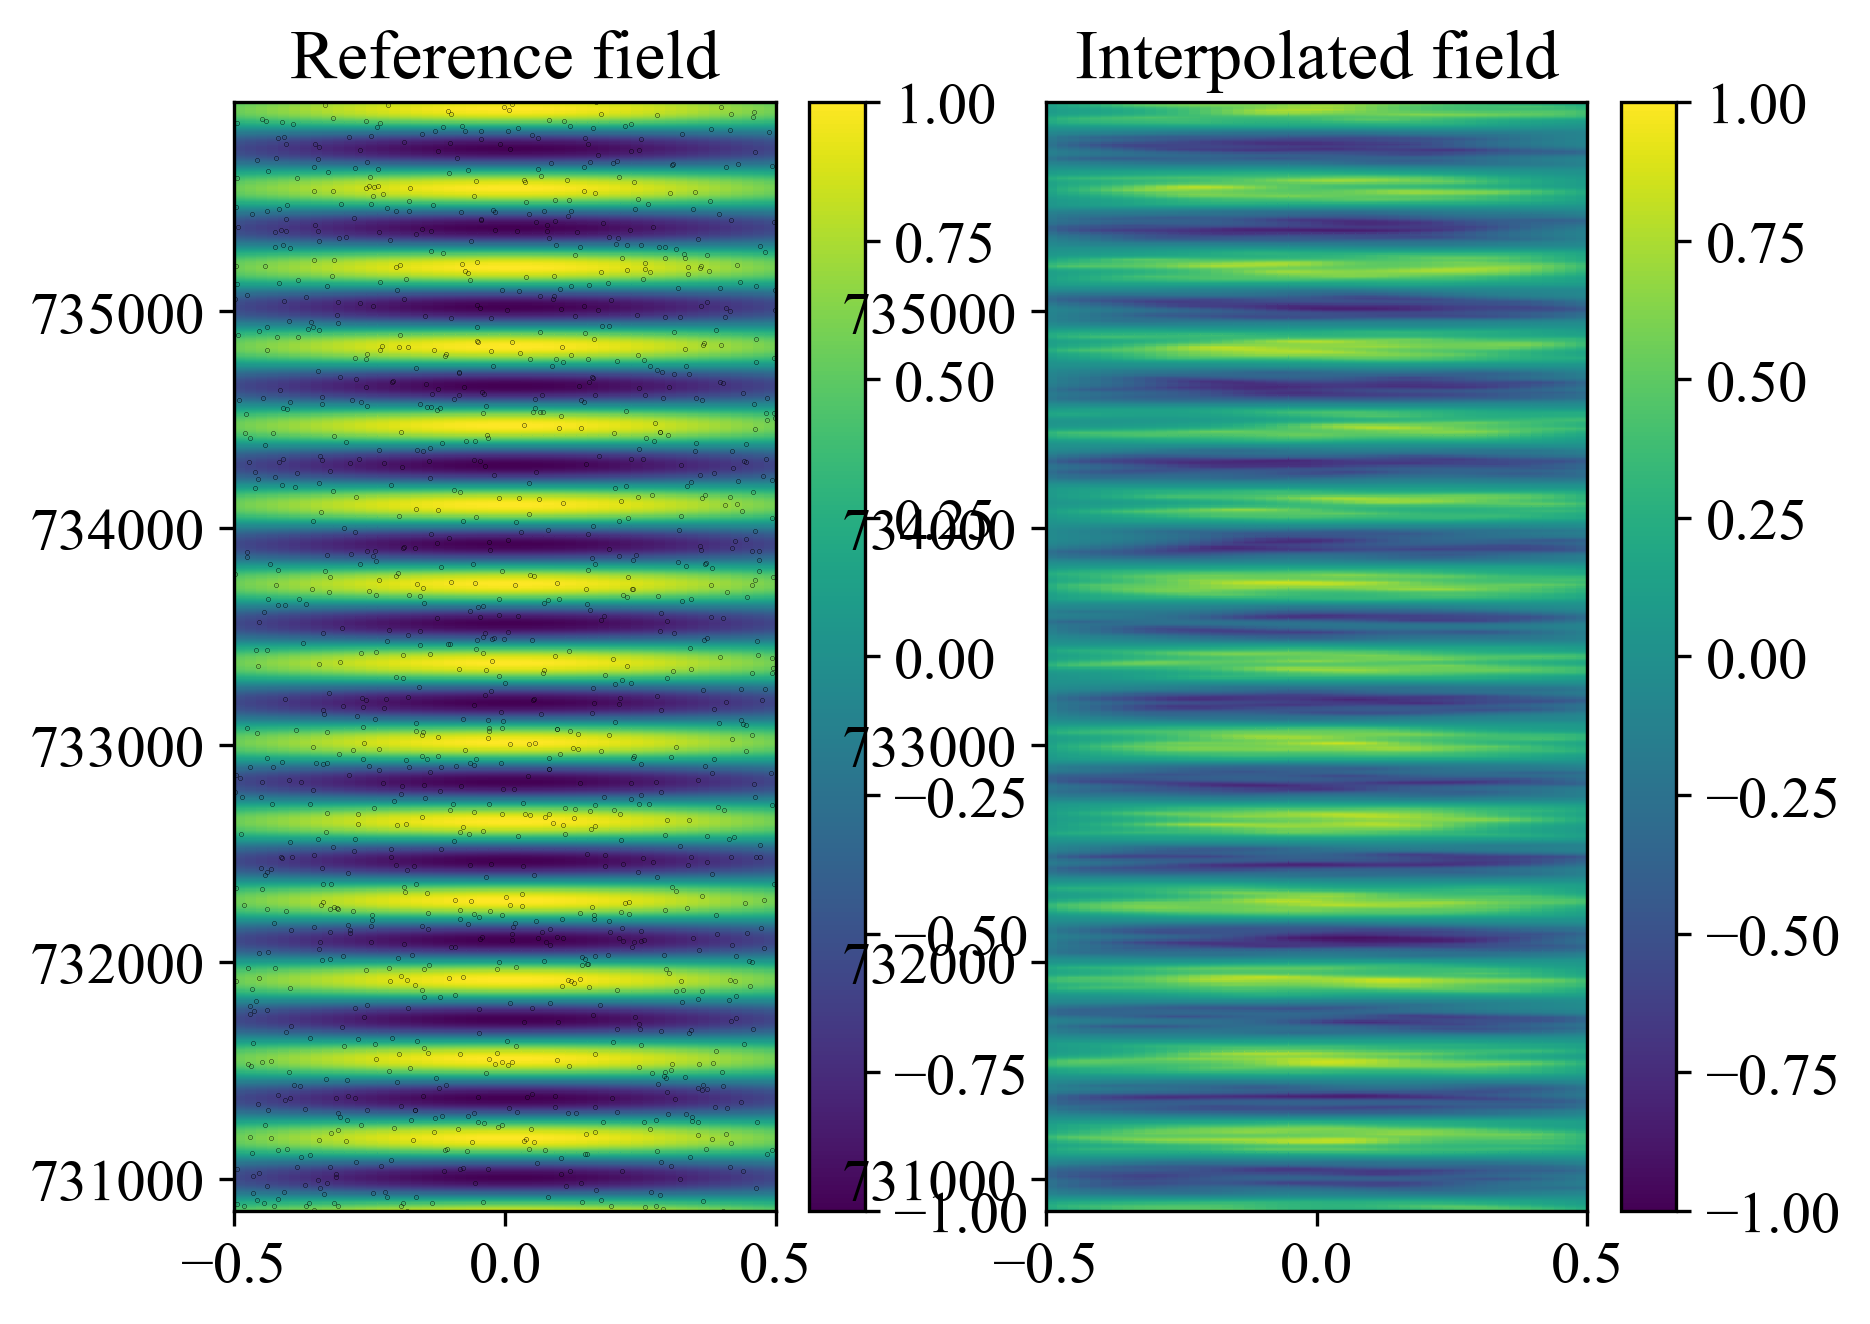

In [75]:
# plotting of results
subplot(1,2,1);
pcolor(xi, ti, fref);
colorbar()
clim(-1, 1)
plot(x, t, "k.", markersize=.2);
title("Reference field");

subplot(1,2,2);
pcolor(xi, ti, fi);
xticks()
colorbar()
clim(-1,1)
title("Interpolated field");

In [84]:
bb = fi - fref;

0.972989600925678

In [86]:
typeof(fref)

Array{Float64,2}

In [87]:
frefvec = vec(fref);
typeof(frefvec)

Array{Float64,1}